In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('Uniqlo.csv')
test = pd.read_csv('Uniqlo-test.csv')

In [2]:
train = train.rename(columns={'Stock Trading': 'Trading Value'})
train = train.iloc[::-1].reset_index(drop=True)
test = test.rename(columns={'Stock Trading': 'Trading Value'})
test = test.iloc[::-1].reset_index(drop=True)

In [3]:
train

,Date,Open,High,Low,Close,Volume,Trading Value
0,2012-01-04,14050,14050,13700,13720,559100,7719804000
1,2012-01-05,13720,13840,13600,13800,511500,7030811000
2,2012-01-06,13990,14030,13790,13850,765500,10635609000
3,2012-01-10,13890,14390,13860,14390,952300,13533413000
4,2012-01-11,14360,14750,14280,14590,1043400,15191988000
...,...,...,...,...,...,...,...
1221,2016-12-26,43310,43660,43090,43340,358200,15547803000
1222,2016-12-27,43140,43700,43140,43620,400100,17427993000
1223,2016-12-28,43940,43970,43270,43270,339900,14780670000
1224,2016-12-29,43000,43220,42540,42660,448400,19188227000


In [4]:
test

,Date,Open,High,Low,Close,Volume,Trading Value
0,2017-01-04,42480,43330,42450,43290,648100,27916728000
1,2017-01-05,43250,43330,42470,42590,516800,22124250000
2,2017-01-06,40500,41030,39720,39720,1435500,57708934000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-11,38710,38880,38480,38560,545900,21089798000
5,2017-01-12,38300,38450,37930,38010,800900,30540359000
6,2017-01-13,38900,39380,38240,38430,1321200,51197289000


In [5]:
train.describe()

,Open,High,Low,Close,Volume,Trading Value
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


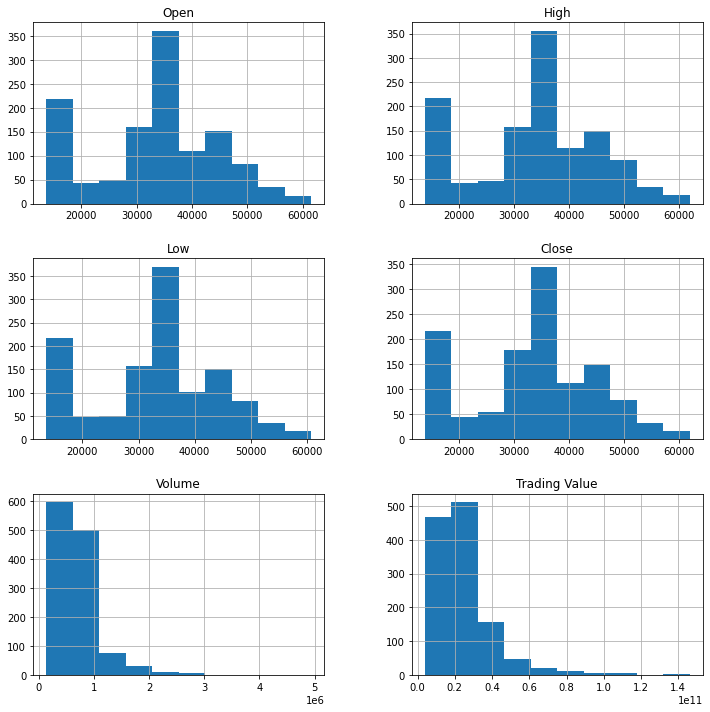

In [6]:
train.hist(figsize=(12,12));

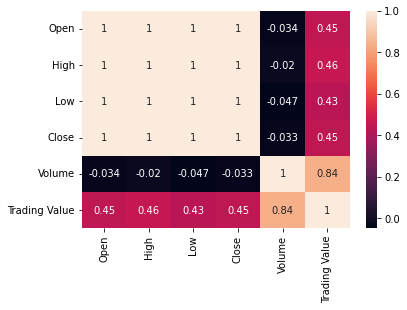

In [7]:
corr = train.corr()
sns.heatmap(corr, annot=True);

In [8]:
model = LinearRegression()
X = train[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y = train[['Close']]
model.fit(X, y)

LinearRegression()

In [9]:
X_test = test[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y_test = test[['Close']]

pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, pred)
mae

219.07107798538553

In [11]:
mse = mean_squared_error(y_test, pred)
mse

75490.94173540614

In [12]:
rms = np.sqrt(mse)
rms

274.75614958614875